<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *6*: *Regression***

###**Tenggat Waktu: 24 November 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab1_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **24 November 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Valecnius Apriady Primayudha"
KELAS = "D"
NPM = "2106750830"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Valecnius Apriady Primayudha dari kelas D dengan NPM 2106750830, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Valecnius Apriady Primayudha)


## Intro to Linear Models for Regression and Classification

### Linear Regression

Linear regression adalah teknik pencarian nilai-nilai parameter suatu persamaan linear yang cocok dengan data. Persamaan linear yang cocok adalah persamaan yang memiliki perbedaan hasil prediksi dan aktual minimal.

Contoh persamaan linear

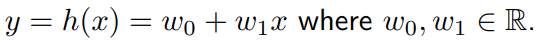

Persamaan di atas adalah fungsi yang memetakan **X** ke **Y** (anggap Y = h(x)), dengan:
- w0 adalah intersep
- w1 adalah koefisien
- x adalah nilai independen
- y adalah nilai dependen

Tentunya, persamaan ini bisa digeneralisasikan untuk banyak nilai x (fitur lebih dari 1) untuk menentukan nilai y. Berikut adalah persamaannya.

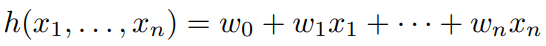

atau

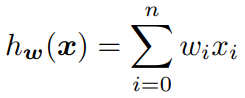

Nilai-nilai parameter seperti w0, w1, w2, wn, dst. inilah yang dicari untuk mendapatkan persamaan/fungsi yang cocok dengan data pada linear regression.

Pencarian didasarkan pada peminimalan error/residual dengan meminimal kan fungsi loss linear regression. J(w) di bawah ini adalah contoh fungsi loss linear regression.

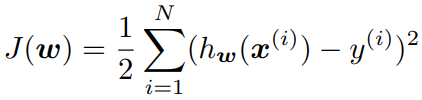

Proses peminimalan fungsi loss disebut dengan gradient descent yang bisa Anda pelajari lebih lanjut dari slide kuliah. :)

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Linear Regression dengan Scikit-learn**

Scikit-learn memiliki modul LinearRegression untuk membuat model linear regression. Di bawah ini adalah contoh implementasinya.

Pada percobaan kali ini, kita akan menggunakan data buatan yang terdiri dari 1 variabel dan 1 target. Hubungan antara variabel dan target dipenuhi oleh fungsi `y = 1+2X`. Nilai-nilai 1 dan 2, secara berurutan dapat dianggap sebagai nilai w0 dan w1.

In [3]:
import numpy as np

# Membuat data buatan dengan beberapa noises yang disengaja

X = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 1])
X_train  = X.reshape(-1, 1)
y_train  = np.array([5, 7, 5, 9, 10, 4, 3, 11, 11,  2])

print('X: ', X_train)
print('y: ', y_train)

X:  [[2]
 [3]
 [2]
 [4]
 [5]
 [2]
 [1]
 [5]
 [5]
 [1]]
y:  [ 5  7  5  9 10  4  3 11 11  2]


In [4]:
# Melatih model linear regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

Pada tahap ini, trained model 'linear' telah mengandung informasi (parameter-parameter) yang memenuhi suatu persamaan linear. Hal tersebut dapat kita lihat dengan cara di bawah ini.

In [5]:
# Melihat nilai koefisien dan intersep persamaan linear regression pada trained model
print("Koefisien persamaan linear: \n", linear.coef_)
print("Intersep persamaan linear: \n", linear.intercept_)

Koefisien persamaan linear: 
 [2.04166667]
Intersep persamaan linear: 
 0.5749999999999993


Berdasarkan persamaan linear tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

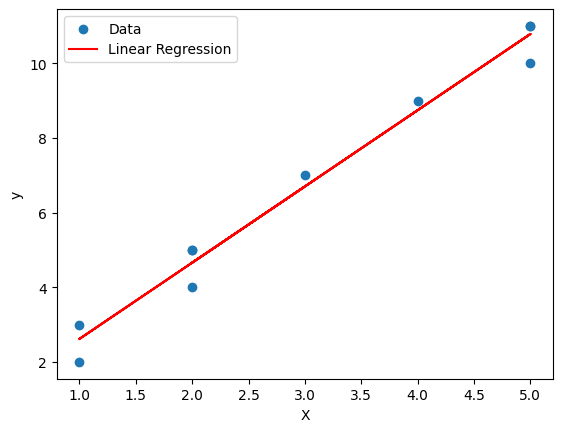

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = linear.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='red', label="Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [7]:
# Melakukan percobaan prediksi model linear regression menggunakan data testing buatan

X_test = np.array([[2], [4], [7]])
y_test = np.array([5, 9, 15])

y_predict = linear.predict(X_test)

print(y_predict)

[ 4.65833333  8.74166667 14.86666667]


Hasil prediksi (y_predict) memiliki nilai yang hampir mirip dengan nilai y yang sebenarnya (y_test). Hal ini menandakan model memiliki performa yang baik.

Performa model regresi dapat diukur dengan beberapa metrik evaluasi, contohnya adalah R-squared. Lihat kode di bawah ini.

In [8]:
from sklearn import metrics

# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))

R-squared: 0.9960279605263158


Dari hasil di atas, dapat diketahui bahwa perbedaan antara prediksi dan aktual memiliki nilai yang kecil. Untuk implementasi Linear Regression lebih lanjutnya menggunakan **sklearn** dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

### Ridge and Lasso Regression

Linear regression adalah model yang memiliki ciri high-bias dan low-variance. Biasanya, model seperti ini cenderung tidak overfit. Walau demikian, linear regression masih dapat mengalami overfitting, apalagi pada data yang memiliki banyak fitur (high-dimension).

Untuk mengatasi hal tersebut, diperlukan regularisasi. Pada linear regression, regularisasi adalah teknik untuk meminimalkan fungsi loss dengan penambahan regularization term pada fungsi loss. Dua teknik regularisasi pada linear regression adalah Ridge dan Lasso. Berikut adalah modifikasi fungsi loss linear regression pada ridge dan lasso regression.

- Ridge regression

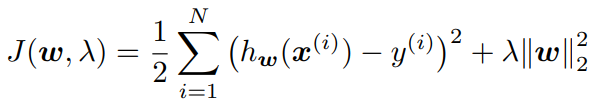

- Lasso Regression

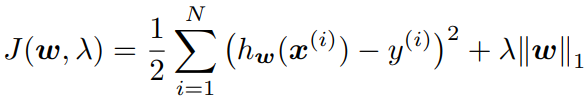

Term tambahan pada fungsi loss tersebut berperan seperti bobot pinalti untuk meminimalkan overfitting. Pada regularization term terdapat parameter λ yang pada sumber lain disebut sebagai α (alpha).

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Ridge dan Lasso Regression dengan Scikit-learn**

Berikut adalah contoh implementasi ridge dan lasso regression menggunakan modul scikit-learn pada dataset housing.

In [9]:
# Melatih model ridge regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=2) # Mengatur hyperparameter alpha=2
ridge.fit(X_train, y_train)

Ridge(alpha=2)

Setelah pelatihan selesai, **ridge** memiliki parameter hasil generalisasi ridge regression dengan memanfaatkan bobot penalti. Parameter yang diperoleh dapat dilihat pada kode berikut ini.

In [10]:
# Melihat nilai koefisien dan intersep persamaan ridge regression pada trained model

print("Koefisien persamaan regresi ridge: \n", ridge.coef_)
print("Intersep persamaan regresi ridge: \n", ridge.intercept_)

Koefisien persamaan regresi ridge: 
 [1.88461538]
Intersep persamaan regresi ridge: 
 1.046153846153846


Berdasarkan persamaan linear pada **ridge** regression tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

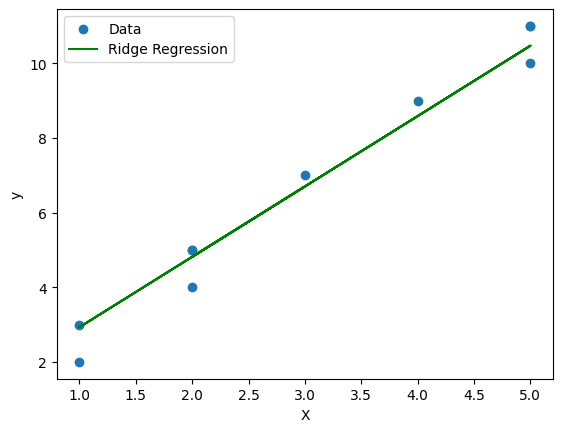

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = ridge.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='green', label="Ridge Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

Untuk **lasso** regression, berikut adalah contoh implementasinya.

In [12]:
# Melatih model lasso regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=2) # Mengatur hyperparameter alpha=2
lasso.fit(X_train, y_train)

Lasso(alpha=2)

Setelah pelatihan selesai, **lasso** memiliki parameter hasil generalisasi lasso regression dengan memanfaatkan bobot penalti. Parameter yang diperoleh dapat dilihat pada kode berikut ini.

In [13]:
# Melihat nilai koefisien dan intersep persamaan lasso regression pada trained model

print("Koefisien persamaan regresi lasso: \n", lasso.coef_)
print("Intersep persamaan regresi lasso: \n", lasso.intercept_)

Koefisien persamaan regresi lasso: 
 [1.20833333]
Intersep persamaan regresi lasso: 
 3.075


Berdasarkan persamaan linear pada **lasso** regression tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

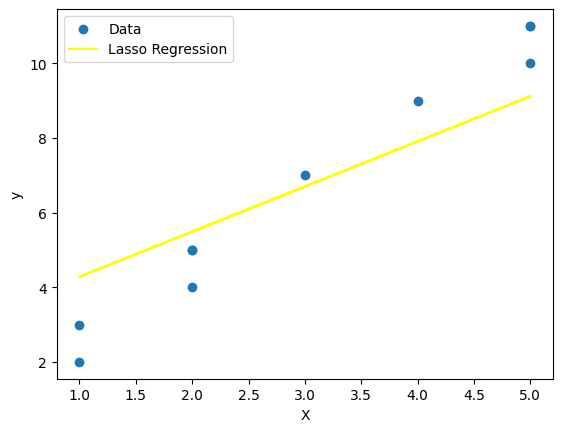

In [14]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = lasso.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='yellow', label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

Perhatikan plot visualisasi pada ketiga plot berikut ini. Seperti yang sudah disebutkan sebelumnya, model regresi linear memiliki kecenderungan untuk tidak overfit. Untuk itu, penerapan regularisasi melalui bobot penalti tidak memperbaik kinerja dari model pada konteks data sederhana yang kita bentuk.

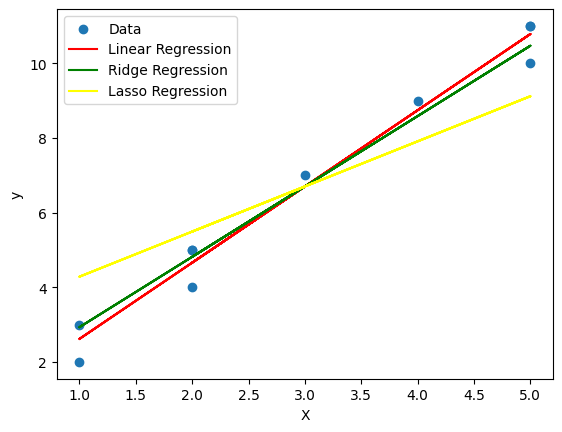

In [15]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred_linear = linear.predict(X_train)
y_pred_ridge = ridge.predict(X_train)
y_pred_lasso = lasso.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred_linear, color='red', label="Linear Regression")
plt.plot(X, y_pred_ridge, color='green', label="Ridge Regression")
plt.plot(X, y_pred_lasso, color='yellow', label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

**NOTE**: Parameter alpha adalah parameter yang merepresentasikan “kekuatan” dari regularisasi yang dilakukan oleh model. Regularisasi adalah teknik modifikasi yang digunakan untuk mengurangi *generalization error*, dengan kata lain menghindari *overfitting*. Hal ini dilakukan dengan memberikan batasan/*constraint* atau penambahan penalti pada parameter/atribut yang kita gunakan. Untuk lebih jelas, silahkan baca dokumentasi model Ridge dan Lasso yang ada pada link berikut : [API Reference — scikit-learn 1.0.1 documentation ](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

Anda dipersilakan untuk mencoba sendiri memprediksi dan mengukur performa model ridge dan lasso regression. Performa mungkin tidak akan jauh berbeda dengan linear regression karena hanya mengunakan data yang sangat kecil. Untuk implementasi lebih lanjutnya menggunakan **sklearn** dapat dilihat pada kedua link berikut:
* [Lasso Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).
* [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

### Penjelasan Dataset untuk *Linear Regression*, *Lasso Regression*, dan *Ridge Regression*

Dataset yang digunakan pada bagian linear regression, lasso regression, dan ridge regression adalah data harga dan atribut dari sekitar 54000 berlian. Data didapatkan dari Kaggle dengan beberapa perubahan. Berikut penjelasan masing-masing kolom pada data.

- **Price:** Harga berlian dalam satuan dolar AS (\$326 — \$18,823)

- **Carat:** Berat/Bobot berlian (0.2 — 5.01)

- **Cut:** Kualitas potongan berlian (Fair, Good, Very Good, Premium, Ideal)

- **Color:** Kualitas warna berlian, dari J (paling buruk) hingga D (paling baik)

- **Clarity:** Ukuran seberapa jernih berlian (I1 (paling buruk), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (paling baik))

- **X:** Ukuran panjang berlian dalam satuan mm (0 — 10.74)

- **Y:** Ukuran lebar berlian dalam satuan mm (0 — 58.9)

- **Z:** Ukuran kedalaman berlian dalam satuan mm (0 — 31.8)

- **Depth:** Persentase total dari kedalaman berlian =  100 * z / mean(x, y)  (43 — 79)

- **Table:** Lebar bagian atas berlian relatif terhadap titik terlebar (43 — 95)

**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/shivam2503/diamonds
<br/> <br/>
<img src="https://yourdiamondguru.com/wp-content/uploads/2018/09/GIA-Cut-Scale.png" alt="Struktur Berlian"/>

In [16]:
# Import dataset diamonds dan menampilkan 5 row teratas
import pandas as pd

df_diamond = pd.read_csv('diamonds.csv')
df_diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [17]:
# Menampilkan informasi keseluruhan terkait dataset
df_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#### Soal 1: Data Preprocessing untuk Regresi

a) Persiapkan data untuk dilatih oleh model regresi.
Pada tahap ini, Anda diminta melakukan persiapan sebelum melakukan training pada model. Berikut adalah persiapan yang `setidaknya` dilakukan sebagai berikut:
- Melakukan encoding pada data kategorikal
- Melakukan feature selection, pilih fitur-fitur yang relevan dalam memprediksi harga berlian (`price`)
- Membagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.
- Melakukan standarisasi pada data selain data kategorikal. Hint: Standarisasi dilatih terlebih dahulu pada data training, lalu lakukan standarisasi untuk kedua training dan testing set.

In [18]:
diamond = df_diamond

In [19]:
diamond.shape

(53940, 10)

In [20]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [21]:
# diamond["color"].unique()
diamond.groupby(by=["table"])["price"].mean()

table
43.0     4997.0
44.0      474.0
49.0     2290.5
50.0     8995.5
50.1     3353.0
         ...   
71.0     1633.0
73.0     2406.5
76.0     2362.0
79.0     2301.0
95.0    13387.0
Name: price, Length: 127, dtype: float64

In [22]:
from sklearn.preprocessing import OrdinalEncoder

# Melakukan encoding pada data kategorikal
clarity = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
cut = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
color = ["J", "I", "H", "G", "F", "E", "D"]
enc = OrdinalEncoder(categories=[clarity, cut, color])

categoricalColumn = ["clarity", "cut", "color"]
diamond[categoricalColumn] = enc.fit_transform(diamond[categoricalColumn])


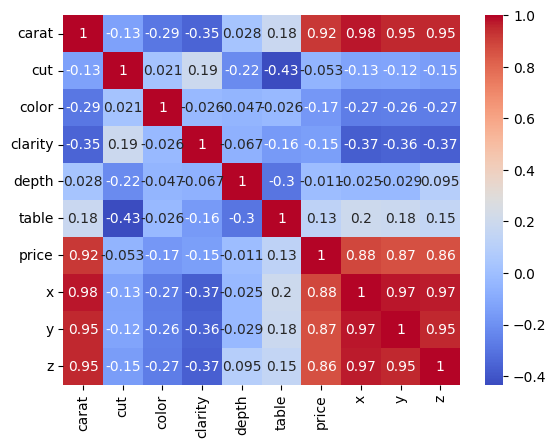

In [23]:
import seaborn as sns
corr = diamond.corr()

# Create a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Dari hasil visualisasi di atas terlihat bahwa korelasi antara cut dan price sangat kecil  sehingga fitur cut dapat dihilangkan saja

In [24]:
# drop column table
diamond = diamond.drop(columns=["cut"])

In [25]:
x_diamond = diamond.drop(columns=["price"], axis=1)
x_diamond.head()

,carat,color,clarity,depth,table,x,y,z
0,0.23,5.0,1.0,61.5,55.0,3.95,3.98,2.43
1,0.21,5.0,2.0,59.8,61.0,3.89,3.84,2.31
2,0.23,5.0,4.0,56.9,65.0,4.05,4.07,2.31
3,0.29,1.0,3.0,62.4,58.0,4.20,4.23,2.63
4,0.31,0.0,1.0,63.3,58.0,4.34,4.35,2.75


Melakukan dataset menjadi data training dan data testing

In [26]:
y_diamond = diamond["price"]
y_diamond.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
x_train_diamond, x_test_diamond, y_train_diamond, y_test_diamond = train_test_split(x_diamond, y_diamond, test_size = 0.2, random_state = 123)


In [28]:
x_train_diamond.shape

(43152, 8)

Melakukan standarisasi pada kolom dengan data numerik

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

In [30]:
x_train_diamond

,carat,color,clarity,depth,table,x,y,z
13361,0.24,4.0,3.0,62.9,58.0,3.94,4.01,2.50
18592,1.02,4.0,4.0,62.4,58.0,6.42,6.47,4.02
46843,0.56,4.0,2.0,61.1,56.0,5.35,5.33,3.26
29633,0.32,0.0,4.0,62.0,54.7,4.39,4.42,2.73
23002,1.47,3.0,3.0,62.7,56.0,7.15,7.18,4.49
...,...,...,...,...,...,...,...,...
15377,0.35,1.0,2.0,61.3,54.0,4.56,4.51,2.78
17730,1.01,3.0,5.0,62.4,61.0,6.34,6.38,3.97
28030,0.30,5.0,3.0,62.1,55.0,4.30,4.33,2.68
15725,1.00,3.0,4.0,62.9,57.0,6.36,6.32,3.99


In [31]:
numColumn = ["carat", "depth", "x", "y", "z"]

In [32]:
x_train_diamond_scaled = x_train_diamond
x_test_diamond_scaled = x_test_diamond
for column in x_train_diamond_scaled.columns:
    if column in numColumn:
        x_train_diamond_scaled[column] = scaler.fit_transform(x_train_diamond_scaled[column].values.reshape(-1,1))
        x_test_diamond_scaled[column] = scaler.transform(x_test_diamond_scaled[column].values.reshape(-1,1))
        


In [33]:
x_train_diamond_scaled.head()

,carat,color,clarity,depth,table,x,y,z
13361,-1.178278,4.0,3.0,0.802162,58.0,-1.596833,-1.501307,-1.466861
18592,0.467782,4.0,4.0,0.452516,58.0,0.613282,0.638942,0.678094
46843,-0.502971,4.0,2.0,-0.456564,56.0,-0.340276,-0.352881,-0.394383
29633,-1.009451,0.0,4.0,0.172799,54.7,-1.195804,-1.144599,-1.142295
23002,1.417433,3.0,3.0,0.662304,56.0,1.263841,1.256656,1.341337


In [34]:
x_test_diamond_scaled

,carat,color,clarity,depth,table,x,y,z
32685,-1.030555,3.0,4.0,0.872091,57.0,-1.258186,-1.266402,-1.170518
36258,-0.714005,5.0,1.0,-0.316706,55.0,-0.670011,-0.639988,-0.676614
14429,0.868746,2.0,2.0,0.452516,58.0,0.978664,0.917348,1.002660
36250,-0.819521,5.0,3.0,0.242728,57.0,-0.883893,-0.822692,-0.817730
460,0.214542,0.0,3.0,0.732233,55.0,0.417224,0.369236,0.480533
...,...,...,...,...,...,...,...,...
38329,-1.009451,5.0,6.0,-0.036989,55.0,-1.169069,-1.170700,-1.156407
32583,-1.030555,4.0,6.0,0.102870,55.0,-1.213628,-1.144599,-1.156407
51564,-0.376351,2.0,7.0,-1.995007,58.0,-0.072923,-0.135376,-0.323826
10233,0.826539,1.0,1.0,0.592374,58.0,0.907370,0.839047,0.946214


#### Soal 2: Linear Regression

a) Buatlah sebuah model regresi linear berdasarkan fitur-fitur yang terpilih sebelumnya dengan `price` sebagai target prediksi. Tampilkan hasil prediksinya pada keseluruhan data uji.

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluation_lasso_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Display the metrics
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared: {r2:.2f}")

In [36]:
from sklearn.linear_model import LinearRegression

linear_diamond = LinearRegression()
linear_diamond.fit(x_train_diamond_scaled, y_train_diamond)

LinearRegression()

In [37]:
diamond_y_predict = linear_diamond.predict(x_test_diamond_scaled)

In [38]:
comparison = pd.DataFrame({"actual: ": y_test_diamond, 'prediction: ': diamond_y_predict})
comparison

,actual:,prediction:
32685,802,124.467176
36258,935,615.088135
14429,5826,6324.984471
36250,935,1085.297313
460,2817,3525.701918
...,...,...
38329,1020,2086.412749
32583,801,1675.779736
51564,2389,3951.896143
10233,4745,5322.171482


In [39]:
evaluation_lasso_model(diamond_y_predict, y_test_diamond)

Mean Absolute Error (MAE): 813.35
Mean Squared Error (MSE): 1511867.16
Root Mean Squared Error (RMSE): 1229.58
R-squared: 0.90


b) Visualisasikan kinerja model regresi linear yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

In [40]:
x_train_diamond_scaled.shape

(43152, 8)

d:\KULIAH\kasdad\lab6\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


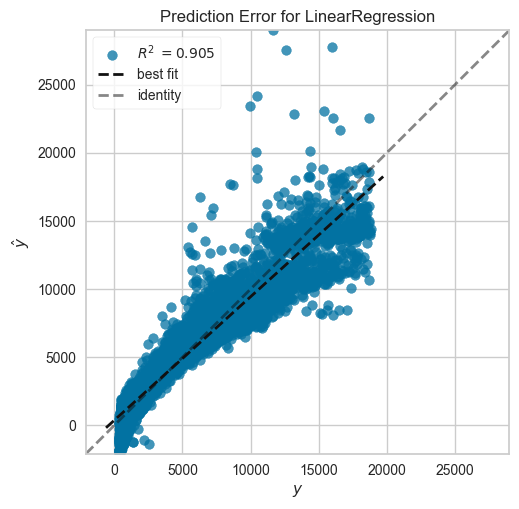

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [41]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

visualize = PredictionError(linear_diamond)
visualize.fit(x_train_diamond_scaled, y_train_diamond)
visualize.score(x_test_diamond_scaled, y_test_diamond)
visualize.show()

# plt.show()

Gambar di atas merupakn Prediction Error Plot dimana garis "identity" merupakan garis yang ideal menggambarkan hasil prediksi yang sempurna, sedangkan garis "best fit" merupakan garis haisl prediksi yang dihasilkan oleh model yang sudah dibuat.

c) Tampilkan nilai dari R squared yang dihasilkan dengan menggunakan **cross validation** untuk mendapatkan performa kinerja sebenarnya menggunakan data latih yang ada.

> Catatan: Jumlah split dibebaskan.

In [42]:
from sklearn.model_selection import cross_val_score, KFold
linear_diamond_cross_eval = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=1)
scores = cross_val_score(linear_diamond_cross_eval, x_train_diamond_scaled, y_train_diamond, scoring='r2', cv=kf)
print(f'Nilai dari R squared hasil evaluasi cross validation: {scores.mean()}')

Nilai dari R squared hasil evaluasi cross validation: 0.906339800421623


#### Soal 3: Lasso Regression

Ikuti langkah-langkah di bawah ini. **Gunakan training dan testing set yang sama dengan Linear Regression**.

a) Buatlah sebuah list alpha yang berisi minimal 5 buah alpha.

In [43]:
alphas = [1, 2, 3, 4, 5, 6, 7, 8]

b) Buatlah (fit) model regresi lasso berdasarkan fitur-fitur yang terpilih di awal sebanyak nilai alpha yang telah ditentukan.

In [44]:
from sklearn.linear_model import Lasso


diamond_lasso_1 = Lasso(alpha=alphas[0])
diamond_lasso_1.fit(x_train_diamond_scaled, y_train_diamond)

Lasso(alpha=1)

In [45]:
diamond_lasso_2 = Lasso(alpha=alphas[1])
diamond_lasso_2.fit(x_train_diamond_scaled, y_train_diamond)

Lasso(alpha=2)

In [46]:
diamond_lasso_3 = Lasso(alpha=alphas[2])
diamond_lasso_3.fit(x_train_diamond_scaled, y_train_diamond)

Lasso(alpha=3)

In [47]:
diamond_lasso_4 = Lasso(alpha=alphas[3])
diamond_lasso_4.fit(x_train_diamond_scaled, y_train_diamond)

Lasso(alpha=4)

In [48]:
diamond_lasso_5 = Lasso(alpha=alphas[4])
diamond_lasso_5.fit(x_train_diamond_scaled, y_train_diamond)

Lasso(alpha=5)

In [49]:
diamond_lasso_6 = Lasso(alpha=alphas[5])
diamond_lasso_6.fit(x_train_diamond_scaled, y_train_diamond)

Lasso(alpha=6)

In [50]:
diamond_lasso_7 = Lasso(alpha=alphas[6])
diamond_lasso_7.fit(x_train_diamond_scaled, y_train_diamond)

Lasso(alpha=7)

In [51]:
diamond_lasso_8 = Lasso(alpha=alphas[7])
diamond_lasso_8.fit(x_train_diamond_scaled, y_train_diamond)

Lasso(alpha=8)

c) Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model lasso regression pada testing set

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluation_lasso_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Display the metrics
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared: {r2:.8f}")

In [53]:
diamond_lasso_predict_1 = diamond_lasso_1.predict(x_test_diamond_scaled)
evaluation_lasso_model(y_test_diamond, diamond_lasso_predict_1)

Mean Absolute Error (MAE): 814.57
Mean Squared Error (MSE): 1511947.96
Root Mean Squared Error (RMSE): 1229.61
R-squared: 0.90479421


In [54]:
diamond_lasso_predict_2 = diamond_lasso_2.predict(x_test_diamond_scaled)
evaluation_lasso_model(y_test_diamond, diamond_lasso_predict_2)

Mean Absolute Error (MAE): 815.86
Mean Squared Error (MSE): 1512025.28
Root Mean Squared Error (RMSE): 1229.64
R-squared: 0.90478934


In [55]:
diamond_lasso_predict_3 = diamond_lasso_3.predict(x_test_diamond_scaled)
evaluation_lasso_model(y_test_diamond, diamond_lasso_predict_3)

Mean Absolute Error (MAE): 817.21
Mean Squared Error (MSE): 1512265.84
Root Mean Squared Error (RMSE): 1229.74
R-squared: 0.90477420


In [56]:
diamond_lasso_predict_4 = diamond_lasso_4.predict(x_test_diamond_scaled)
evaluation_lasso_model(y_test_diamond, diamond_lasso_predict_4)

Mean Absolute Error (MAE): 818.62
Mean Squared Error (MSE): 1512668.45
Root Mean Squared Error (RMSE): 1229.91
R-squared: 0.90474884


In [57]:
diamond_lasso_predict_5 = diamond_lasso_5.predict(x_test_diamond_scaled)
evaluation_lasso_model(y_test_diamond, diamond_lasso_predict_5)

Mean Absolute Error (MAE): 820.07
Mean Squared Error (MSE): 1513232.83
Root Mean Squared Error (RMSE): 1230.14
R-squared: 0.90471331


In [58]:
diamond_lasso_predict_6 = diamond_lasso_6.predict(x_test_diamond_scaled)
evaluation_lasso_model(y_test_diamond, diamond_lasso_predict_6)

Mean Absolute Error (MAE): 821.60
Mean Squared Error (MSE): 1513956.45
Root Mean Squared Error (RMSE): 1230.43
R-squared: 0.90466774


In [59]:
diamond_lasso_predict_7 = diamond_lasso_7.predict(x_test_diamond_scaled)
evaluation_lasso_model(y_test_diamond, diamond_lasso_predict_7)

Mean Absolute Error (MAE): 823.20
Mean Squared Error (MSE): 1514843.28
Root Mean Squared Error (RMSE): 1230.79
R-squared: 0.90461190


In [60]:
diamond_lasso_predict_8 = diamond_lasso_8.predict(x_test_diamond_scaled)
evaluation_lasso_model(y_test_diamond, diamond_lasso_predict_8)

Mean Absolute Error (MAE): 824.85
Mean Squared Error (MSE): 1515891.71
Root Mean Squared Error (RMSE): 1231.22
R-squared: 0.90454588


d) Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan.

Model terbaik berdasarkan nilai R-squared yang ditampilkan dari masing-masing model lasso regression di atas adalah model yang memiliki nilai alpha 1 (diamond_lasso_predict_1).

e) Tampilkan array hasil prediksi dari model regresi lasso yang terpilih pada keseluruhan data uji.

In [61]:
comparison = pd.DataFrame({"actual: ": y_test_diamond, 'prediction: ': diamond_lasso_predict_1})
comparison


,actual:,prediction:
32685,802,119.520477
36258,935,613.158530
14429,5826,6332.753127
36250,935,1081.342336
460,2817,3539.594432
...,...,...
38329,1020,2079.306323
32583,801,1667.331184
51564,2389,3962.439000
10233,4745,5329.955514


In [62]:
print(diamond_lasso_predict_1)

[ 119.520477    613.15852991 6332.75312652 ... 3962.43899956 5329.95551385
 2597.86153519]


f)  Visualisasikan kinerja model regresi lasso yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

d:\KULIAH\kasdad\lab6\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


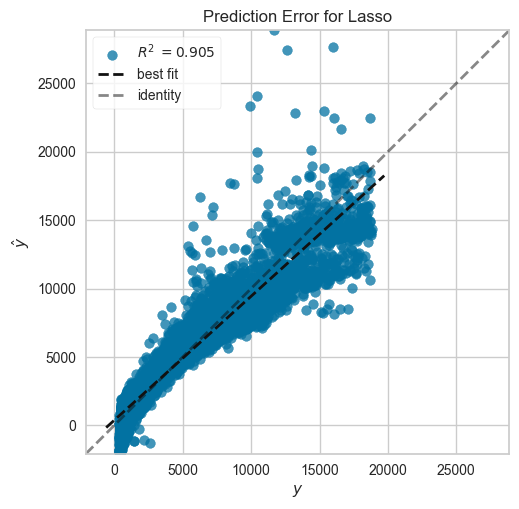

<Axes: title={'center': 'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [63]:
lasso_visualize = PredictionError(diamond_lasso_1)
lasso_visualize.fit(x_train_diamond_scaled, y_train_diamond)
lasso_visualize.score(x_test_diamond_scaled, y_test_diamond)
lasso_visualize.show()

g) Berikan analisis hubungan perubahan nilai parameter alpha dengan kualitas hasil regresi berdasarkan nilai R-squared

Untuk kasus di atas perubahan nilai parameter alpha mempengaruhi nilai R-squared setiap model lasso regression meskipun perubahan nilainya cukup kecil. Semakin besar nilai alpha maka semakin besar juga nilai errornya (MSE, RMSE, MAE) yang mengakibatkan terjaidnya penurunan pada nilai r-squared model. Hal tersebut dikarenakan model lasso regression mencegah overfitting dengan mengurangi bobot dari fitur-fitur yang dianggap tidak begitu penting dan dimana pengurangannya dapat sampai ke nilai 0 atau yang menandakan menghilangkan fitur tersebut.

#### Soal 4: Ridge Regression

Ikuti langkah-langkah di bawah ini. **Gunakan training dan testing set yang sama dengan Linear Regression**.

a) Buatlah sebuah list alpha yang berisi minimal 5 buah alpha.

In [64]:
alphas = [1, 2, 3, 4, 5, 6, 7, 8]

b) Buatlah (fit) model regresi ridge berdasarkan fitur-fitur yang terpilih di awal sebanyak nilai alpha yang telah ditentukan.

In [65]:
from sklearn .linear_model import Ridge

diamond_ridge_1 = Ridge(alpha=alphas[0])
diamond_ridge_1.fit(x_train_diamond_scaled, y_train_diamond)

Ridge(alpha=1)

In [66]:
diamond_ridge_2 = Ridge(alpha=alphas[1])
diamond_ridge_2.fit(x_train_diamond_scaled, y_train_diamond)

Ridge(alpha=2)

In [67]:
diamond_ridge_3 = Ridge(alpha=alphas[2])
diamond_ridge_3.fit(x_train_diamond_scaled, y_train_diamond)

Ridge(alpha=3)

In [68]:
diamond_ridge_4 = Ridge(alpha=alphas[3])
diamond_ridge_4.fit(x_train_diamond_scaled, y_train_diamond)

Ridge(alpha=4)

In [69]:
diamond_ridge_5 = Ridge(alpha=alphas[4])
diamond_ridge_5.fit(x_train_diamond_scaled, y_train_diamond)

Ridge(alpha=5)

In [70]:
diamond_ridge_6 = Ridge(alpha=alphas[5])
diamond_ridge_6.fit(x_train_diamond_scaled, y_train_diamond)

Ridge(alpha=6)

In [71]:
diamond_ridge_7 = Ridge(alpha=alphas[6])
diamond_ridge_7.fit(x_train_diamond_scaled, y_train_diamond)

Ridge(alpha=7)

In [72]:
diamond_ridge_8 = Ridge(alpha=alphas[7])
diamond_ridge_8.fit(x_train_diamond_scaled, y_train_diamond)

Ridge(alpha=8)

c) Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model ridge regression pada testing set

In [73]:
diamond_ridge_predict_1 = diamond_ridge_1.predict(x_test_diamond_scaled)
evaluation_lasso_model(y_test_diamond, diamond_ridge_predict_1)

Mean Absolute Error (MAE): 813.44
Mean Squared Error (MSE): 1511861.18
Root Mean Squared Error (RMSE): 1229.58
R-squared: 0.90479968


In [74]:
diamond_ridge_predict_2 = diamond_ridge_2.predict(x_test_diamond_scaled)
evaluation_lasso_model(y_test_diamond, diamond_ridge_predict_2)

Mean Absolute Error (MAE): 813.53
Mean Squared Error (MSE): 1511855.93
Root Mean Squared Error (RMSE): 1229.58
R-squared: 0.90480001


In [75]:
diamond_ridge_predict_3 = diamond_ridge_3.predict(x_test_diamond_scaled)
evaluation_lasso_model(y_test_diamond, diamond_ridge_predict_3)

Mean Absolute Error (MAE): 813.62
Mean Squared Error (MSE): 1511851.40
Root Mean Squared Error (RMSE): 1229.57
R-squared: 0.90480029


In [76]:
diamond_ridge_predict_4 = diamond_ridge_4.predict(x_test_diamond_scaled)
evaluation_lasso_model(y_test_diamond, diamond_ridge_predict_4)

Mean Absolute Error (MAE): 813.70
Mean Squared Error (MSE): 1511847.58
Root Mean Squared Error (RMSE): 1229.57
R-squared: 0.90480053


In [77]:
diamond_ridge_predict_5 = diamond_ridge_5.predict(x_test_diamond_scaled)
evaluation_lasso_model(y_test_diamond, diamond_ridge_predict_5)

Mean Absolute Error (MAE): 813.79
Mean Squared Error (MSE): 1511844.47
Root Mean Squared Error (RMSE): 1229.57
R-squared: 0.90480073


In [78]:
diamond_ridge_predict_6 = diamond_ridge_6.predict(x_test_diamond_scaled)
evaluation_lasso_model(y_test_diamond, diamond_ridge_predict_6)

Mean Absolute Error (MAE): 813.88
Mean Squared Error (MSE): 1511842.05
Root Mean Squared Error (RMSE): 1229.57
R-squared: 0.90480088


In [79]:
diamond_ridge_predict_7 = diamond_ridge_7.predict(x_test_diamond_scaled)
evaluation_lasso_model(y_test_diamond, diamond_ridge_predict_7)

Mean Absolute Error (MAE): 813.97
Mean Squared Error (MSE): 1511840.34
Root Mean Squared Error (RMSE): 1229.57
R-squared: 0.90480099


In [80]:
diamond_ridge_predict_8 = diamond_ridge_8.predict(x_test_diamond_scaled)
evaluation_lasso_model(y_test_diamond, diamond_ridge_predict_8)

Mean Absolute Error (MAE): 814.05
Mean Squared Error (MSE): 1511839.33
Root Mean Squared Error (RMSE): 1229.57
R-squared: 0.90480105


d) Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan.

Model terbaik berdasarkan nilai R-squared yang ditampilkan dari masing-masing model ridge regression di atas adalah model yang memiliki nilai alpha 8.

e) Tampilkan array hasil prediksi dari model regresi ridge yang terpilih pada keseluruhan data uji.

In [81]:
comparison = pd.DataFrame({"actual: ": y_test_diamond, 'prediction: ': diamond_ridge_predict_1})
comparison

,actual:,prediction:
32685,802,124.075117
36258,935,615.053728
14429,5826,6325.377777
36250,935,1085.110844
460,2817,3526.535438
...,...,...
38329,1020,2085.991912
32583,801,1675.333180
51564,2389,3952.658691
10233,4745,5322.528421


f)  Visualisasikan kinerja model regresi ridge yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

d:\KULIAH\kasdad\lab6\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


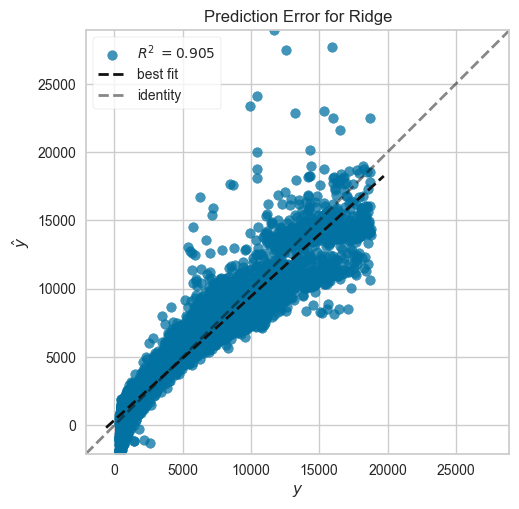

<Axes: title={'center': 'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [82]:
ridge_visualize = PredictionError(diamond_ridge_8)
ridge_visualize.fit(x_train_diamond_scaled, y_train_diamond)
ridge_visualize.score(x_test_diamond_scaled, y_test_diamond)
ridge_visualize.show()

g) Berikan analisis hubungan perubahan nilai parameter alpha dengan kualitas hasil regresi berdasarkan nilai R-squared

Untuk kasus di atas perubahan nilai parameter alpha mempengaruhi nilai R-squared setiap model ridge regression dimana perubahan nilainya cukup kecil. Semakin besar nilai alpha maka semakin besar juga nilai errornya (MSE, RMSE, MAE) dan semakin besar juga nilai r-squared nya. Hal tersebut dikarenakan pencegahan overfiitting yang dilakukan ridge regression pengurangan bobot fitur yang dianggap tidak begitu penting dilakukan tapi tidak akan mencapai nilai nol sehingga setiap fitur masih tetap ikut diperhitungkan. 

h) Jelaskan mengapa lasso regression dapat dijadikan model untuk feature selection, sedangkan ridge regression tidak?

Lasso regression dapat dijadikan model untuk feature selection karena kemampuannya untuk mengurangi koefisien beberapa fitur hingga nol yang mana perlakuan tersebut sama dengan menghilangkan fitur tersebut dari model. Sedangkan ridge regression hanya mengurangi besar koefisien fitur tetapi nilai tersebut tidak akan mencapai nol. 

### Logistic Regression

Logistic regression adalah model linear yang hanya memiliki dua nilai output: 0 atau 1. Oleh karena itu logistic regression lebih cocok dianggap sebagai classifier daripada regressor. Contoh visualisasinya adalah sebagai berikut.

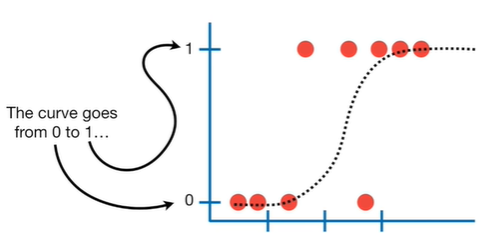

Sumber: https://youtu.be/yIYKR4sgzI8?t=222

Untuk mendapatkan kurva seperti pada gambar, berikut adalah persamaan logistic regression yang memenuhi.

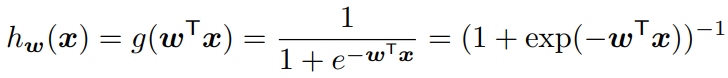

Berbeda dengan model linear, ridge, dan lasso regression yang meminimalkan fungsi loss. Pada logistic regression dilakukan proses memaksimalkan fungsi likelihood untuk menemukan parameter yang cocok dengan data.

Hal ini karena logistic regression merupakan metode klasifikasi. Sehingga, alih-alih meminimalkan perbedaan hasil prediksi, di sini memaksimalkan persamaan hasil prediksi dengan aktual.

Fungsi/persamaan likelihood dimaksimalkan melalui proses yang disebut dengan gradient ascent (tentunya bisa dipelajari sendiri dari slide :D). Berikut adalah persamaan likelihood tersebut.

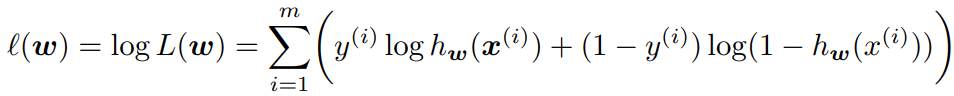

**Sumber gambar (persamaan) dan penjelasan lebih detail:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Logistic Regression menggunakan **sklearn** lebih lanjutnya dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Logistic regression** dengan Scikit-learn

Pada bagian ini kita melatih model logistic regression menggunakan modul dari scikit-learn. Kita dapat membentuk data buatan sederhana dan melihat decision boundary yang dihasilkan. Kali ini target hanya berisi nilai 0 atau 1.


In [83]:
# Membentuk data buatan
x1  = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 7])
x2  = np.array([3, 4, 2, 3, 5, 6, 7, 4, 3, 6])

X_train = np.stack((x1, x2), axis=1)
y_logistic_train   = np.array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1])

print('X: ', X_train)
print('y: ', y_logistic_train)

X:  [[2 3]
 [3 4]
 [2 2]
 [4 3]
 [5 5]
 [2 6]
 [1 7]
 [5 4]
 [5 3]
 [7 6]]
y:  [0 0 0 1 1 0 0 1 1 1]


In [84]:
# Melatih model logistic regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_logistic_train)

LogisticRegression()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [85]:
# Melakukan percobaan prediksi model logistic regression menggunakan data testing buatan

X_test = np.array([[2, 5], [3, 6]])
y_test = np.array([0, 1])

y_logistic_predict = logistic.predict(X_test)

print(y_logistic_predict)

[0 0]


Selanjutnya, kita dapat melihat decision boundary yang dihasilkan oleh model tersebut.

In [86]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2
logistic.intercept_, logistic.coef_
weights = [logistic.intercept_[0],logistic.coef_[0,0], logistic.coef_[0,1]]
print(weights)

[-4.475384273860628, 1.404075585690601, -0.12235462027224128]


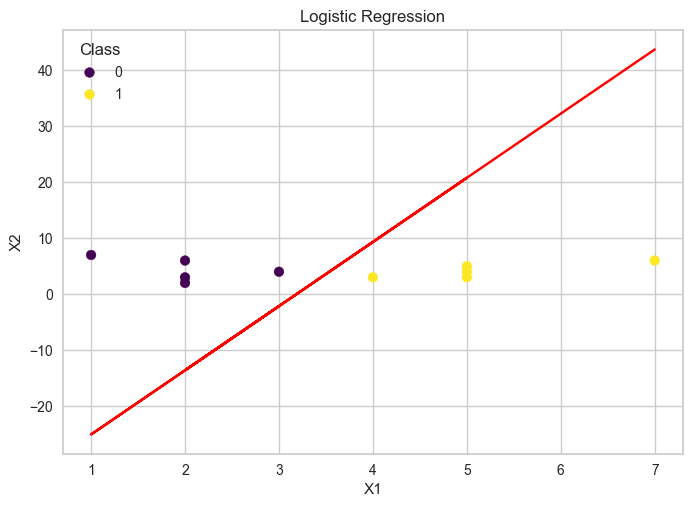

In [87]:
# Plotting the decision boundary
x2_test = (-weights[0] - (weights[1] * x1)) / weights[2]
plt.title('Logistic Regression')
plt.xlabel('X1')
plt.ylabel('X2')
scatter = plt.scatter(x1, x2, c=y_logistic_train, cmap='viridis')
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.plot(x1, x2_test, color='red', label='Decision Boundary')
plt.show()

Untuk mengevaluasi performa logistic regression, tentunya berbeda dengan linear, ridge, maupun lasso regression. Hasil prediksi model logistic regression dievaluasi selayaknya model klasifikasi. Contohnya dengan akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 0.5.

In [88]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", logistic.score(X_test, y_test))

Nilai rata-rata akurasi: 0.5


### Penjelasan Dataset untuk *Logistic Regression*

Dataset yang digunakan pada bagian logistic regression adalah data terkait *diabetes*. Data didapatkan dari Kaggle dengan beberapa perubahan. Berikut penjelasan masing-masing kolom pada data.

- **gender**: jenis kelamin biologis seseorang, yang dapat berdampak pada kerentanan mereka terhadap diabetes.

- **age**: usia, berkisar antara 0-80 tahun.

- **hypertension**: hipertensi (kondisi medis di mana tekanan darah di arteri terus meningkat). 0 = tidak menderita hipertensi, sedangkan 1 = menderita hipertensi.

- **heart_disease**: penyakit jantung. 0 = tidak menderita penyakit jantung, sedangkan 1 = menderita penyakit jantung.

- **smoking_history**: riwayat merokok, ada 6 kategori yaitu: not current,former, No Info, current, never, ever.

- **bmi**: Body Mass Index (pengukuran lemak tubuh berdasarkan berat dan tinggi badan). Kisaran BMI pada dataset adalah 10,16 hingga 71,55. BMI kurang dari 18,5 berarti kurus, 18,5-24,9 normal, 25-29,9 kelebihan berat badan, dan 30 atau lebih berarti obesitas.

- **HbA1c_level**: Tingkat HbA1c (Hemoglobin A1c) ( ukuran rata-rata kadar gula darah seseorang selama 2-3 bulan terakhir)

- **blood_glucose_level**: Tingkat glukosa pada darah.

- **diabetes**: diabetes, 0 = tidak terindikasi diabetes, sedangkan 1 = terindikasi hipertensi.


**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [89]:
import pandas as pd

# Import dataset diabetes dan menampilkan 5 row teratas
df_diabetes = pd.read_csv('diabetes_prediction_dataset.csv')
df_diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Male,48.0,0,0,ever,27.32,6.2,145,0
1,Female,44.0,0,1,ever,31.92,6.1,100,0
2,Female,61.0,0,0,No Info,27.32,4.8,159,0
3,Female,71.0,1,0,never,23.96,4.5,85,0
4,Female,51.0,0,0,current,28.49,6.1,200,0


In [90]:
# Menampilkan informasi keseluruhan terkait dataset
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               17000 non-null  object 
 1   age                  17000 non-null  float64
 2   hypertension         17000 non-null  int64  
 3   heart_disease        17000 non-null  int64  
 4   smoking_history      17000 non-null  object 
 5   bmi                  17000 non-null  float64
 6   HbA1c_level          17000 non-null  float64
 7   blood_glucose_level  17000 non-null  int64  
 8   diabetes             17000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 1.2+ MB


#### Soal 5: Logistic Regression

a) Lakukan encoding pada data kategorikal di dataset dan bagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.

In [91]:
diabetes = df_diabetes
# diabetes.groupby(by=["smoking_history"])["diabetes"].mean()

gender = ["Male", "Female"]
smoking = ["No Info", "current", "ever", "former", "never", "not current"]

encoder = OrdinalEncoder(categories=[gender, smoking])

catColumns = ["gender", "smoking_history"]
diabetes[catColumns] = encoder.fit_transform(diabetes[catColumns])

In [92]:
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,48.0,0,0,2.0,27.32,6.2,145,0
1,1.0,44.0,0,1,2.0,31.92,6.1,100,0
2,1.0,61.0,0,0,0.0,27.32,4.8,159,0
3,1.0,71.0,1,0,4.0,23.96,4.5,85,0
4,1.0,51.0,0,0,1.0,28.49,6.1,200,0


In [93]:
x_diabetes = diabetes.drop(columns=["diabetes"])
y_diabetes = diabetes["diabetes"]

In [94]:
x_train_diabetes, x_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(x_diabetes, y_diabetes, test_size = 0.2, random_state = 123)

b) Buatlah suatu model logistic regression berdasarkan data asli serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter pada LogisticRegression untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [95]:
from sklearn.linear_model import LogisticRegression

logistic_diabetes = LogisticRegression(max_iter=1000)
logistic_diabetes.fit(x_train_diabetes, y_train_diabetes)

LogisticRegression(max_iter=1000)

In [96]:
diabetes_predict_y = logistic_diabetes.predict(x_test_diabetes)
diabetes_predict_y

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [97]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score
import numpy as np

def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [98]:
evaluate_classifier_performance(diabetes_predict_y, y_test_diabetes)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1715
           1       0.88      0.88      0.88      1685

    accuracy                           0.88      3400
   macro avg       0.88      0.88      0.88      3400
weighted avg       0.88      0.88      0.88      3400



Confusion Matrix



prediction,0,1
actual,,
0,1520,195
1,207,1478




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.8817647058823529
F1 Macro Average: 0.8817466609956744
F1 Micro Average: 0.8817647058823529
Precision Macro Average: 0.8817909431133321
Precision Micro Average: 0.8817647058823529
Recall Macro Average: 0.8817243557024337
Recall Micro Average: 0.8817647058823529



c) Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

In [99]:
x_train_diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
9013,0.0,44.0,0,0,1.0,27.32,6.8,160
13722,1.0,59.0,1,1,1.0,29.63,6.6,155
1024,0.0,45.0,0,0,2.0,27.44,4.5,159
12966,1.0,34.0,1,0,4.0,27.32,6.1,145
10944,0.0,60.0,0,1,0.0,39.02,6.1,200


In [100]:
diabetesScaler = StandardScaler()

numeric_column = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]
x_train_diabetes_scaled = x_train_diabetes
x_test_diabetes_scaled = x_test_diabetes
for column in x_train_diabetes.columns:
    if column in numeric_column:
        x_train_diabetes_scaled[column] = diabetesScaler.fit_transform(x_train_diabetes_scaled[column].values.reshape(-1,1))
        x_test_diabetes_scaled[column] = diabetesScaler.transform(x_test_diabetes_scaled[column].values.reshape(-1,1))

In [101]:
x_train_diabetes_scaled.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
9013,0.0,-0.319296,0,0,1.0,-0.274721,0.499456,-0.068759
13722,1.0,0.383058,1,1,1.0,0.041428,0.344542,-0.156333
1024,0.0,-0.272472,0,0,2.0,-0.258297,-1.282058,-0.086274
12966,1.0,-0.787531,1,0,4.0,-0.274721,-0.042744,-0.331480
10944,0.0,0.429881,0,1,0.0,1.326553,-0.042744,0.631829


In [102]:
x_test_diabetes_scaled.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
854,1.0,1.179058,0,0,2.0,-1.117784,-0.120201,-1.382362
14194,0.0,1.038587,0,0,4.0,0.755843,0.344542,-0.594201
3429,1.0,-2.192238,0,0,0.0,-1.806195,-1.049686,-0.103789
12331,0.0,0.102116,0,0,0.0,2.645894,0.034713,-0.156333
3701,1.0,-2.192238,0,0,0.0,-1.963586,-0.275115,-0.664259


d) Buatlah suatu model logistic regression berdasarkan data yang telah dinormalisasi serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [103]:
logistic_diabetes_scaled = LogisticRegression(max_iter=1000)
logistic_diabetes_scaled.fit(x_train_diabetes_scaled, y_train_diabetes)

LogisticRegression(max_iter=1000)

In [104]:
diabetes_predict_y_scaled = logistic_diabetes_scaled.predict(x_test_diabetes_scaled)
diabetes_predict_y_scaled

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [105]:
evaluate_classifier_performance(diabetes_predict_y_scaled, y_test_diabetes)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1715
           1       0.88      0.88      0.88      1685

    accuracy                           0.88      3400
   macro avg       0.88      0.88      0.88      3400
weighted avg       0.88      0.88      0.88      3400



Confusion Matrix



prediction,0,1
actual,,
0,1520,195
1,207,1478




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.8817647058823529
F1 Macro Average: 0.8817466609956744
F1 Micro Average: 0.8817647058823529
Precision Macro Average: 0.8817909431133321
Precision Micro Average: 0.8817647058823529
Recall Macro Average: 0.8817243557024337
Recall Micro Average: 0.8817647058823529



e) Dari kedua model yang dibangun dengan data yang di normalisasi dan data yang tidak dinormalisasi, manakah yang memberikan performa terbaik? berikan analisis mengenai hal tersebut.

Berdasarkan hasil prediksi dari kedua model di atas, akurasi dari model yang dilakukan training menggunakan data yang belum dinormalisasi dan data yang sudah dinormalisasi memiliki nilai yang sama. Hal tersebut dikarenakan variabel independen pada model sudah terdistribusi secara normal atau memiliki skala yang konsisten sehingga hubungan variabel independen dan dependen sudah dapat ditangkap dengan baik tanpa normalisasi

### Softmax Regression

Softmax regression adalah model yang merupakan modifikasi dari logistic regression. Pada model ini, output dapat memiliki nilai lebih dari dua buah. Sehingga, softmax regression disebut sebagai multiclass classification.

Persamaan softmaxe regression:

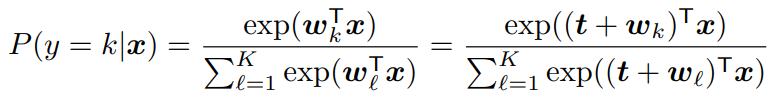

Persamaan likelihood softmaxe regression:

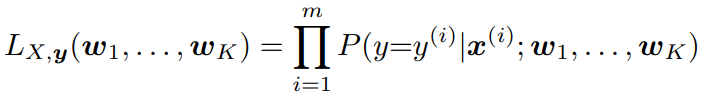

Proses memaksimalkan persamaan likelihood juga sama seperti pada logistic regression, yaitu dengan gradient ascent.

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Softmax Regression menggunakan **sklearn** lebih lanjutnya dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Softmax regression dengan Scikit-learn**

Pada bagian ini kita melatih model softmax regression menggunakan modul dari scikit-learn. Softmax regression pada scikit-learn terdapat pada modul logistic regression dengan pengaturan hyperparameter 'multi_class' menjadi 'multinominal'.

Kita dapat membentuk data buatan sederhana dan melihat decision boundary yang dihasilkan. Kali ini target hanya berisi nilai 0, 1, dan 2.

In [106]:
# Membentuk data buatan
x1  = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 7])
x2  = np.array([3, 6, 2, 3, 5, 6, 3, 4, 3, 6])

X_train = np.stack((x1, x2), axis=1)
y_softmax_train   = np.array([0, 1, 0, 2, 2, 1, 0, 2, 2, 2])

print('X: ', X_train)
print('y: ', y_softmax_train)

X:  [[2 3]
 [3 6]
 [2 2]
 [4 3]
 [5 5]
 [2 6]
 [1 3]
 [5 4]
 [5 3]
 [7 6]]
y:  [0 1 0 2 2 1 0 2 2 2]


In [107]:
# Melatih model softmax regression menggunakan Scikit-learn pada training set

softmax = LogisticRegression(multi_class='multinomial')
softmax.fit(X_train, y_softmax_train)

LogisticRegression(multi_class='multinomial')

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [108]:
# Melakukan percobaan prediksi model softmax regression menggunakan data testing buatan

X_test = np.array([[2, 3], [7, 5]])
y_softmax_test = np.array([0, 2])

y_logistic_predict = softmax.predict(X_test)

print(y_logistic_predict)

[0 2]


Selanjutnya, kita dapat melihat decision boundary yang dihasilkan oleh model tersebut. w0, w1, dan w2 yang dihasilkan masing-masing memiliki 3 nilai yang merepresentasikan tiap boundary.

In [109]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2.
softmax.intercept_, softmax.coef_
print(softmax.intercept_, softmax.coef_)

[ 4.69333009 -2.77478855 -1.91854154] [[-0.7077521  -0.62923839]
 [-0.31769488  0.84892058]
 [ 1.02544698 -0.21968219]]


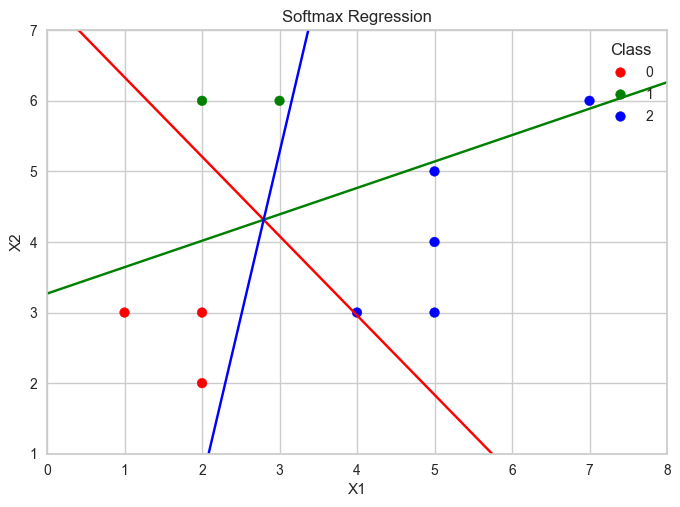

In [110]:
# Plotting the decision boundary
import matplotlib

x1_line = np.array([x1.min() - 1, x1.max() + 1])
boundary_0 = (-softmax.intercept_[0] - (softmax.coef_[0][0] * x1_line)) / softmax.coef_[0][1]
boundary_1 = (-softmax.intercept_[1] - (softmax.coef_[1][0] * x1_line)) / softmax.coef_[1][1]
boundary_2 = (-softmax.intercept_[2] - (softmax.coef_[2][0] * x1_line)) / softmax.coef_[2][1]

fig, ax = plt.subplots()
plt.title('Softmax Regression')
plt.xlabel('X1')
plt.ylabel('X2')
scatter = plt.scatter(x1, x2, c=y_softmax_train, cmap=matplotlib.colors.ListedColormap(["red", "green", "blue"]))
plt.legend(*scatter.legend_elements(),
           loc = 'upper right',
           title = 'Class')
plt.plot(x1_line, boundary_0, color='red')
plt.plot(x1_line, boundary_1, color='green')
plt.plot(x1_line, boundary_2, color='blue')
ax.set_xlim([x1.min() - 1, x1.max() + 1])
ax.set_ylim([x2.min() - 1, x2.max() + 1])
plt.show()

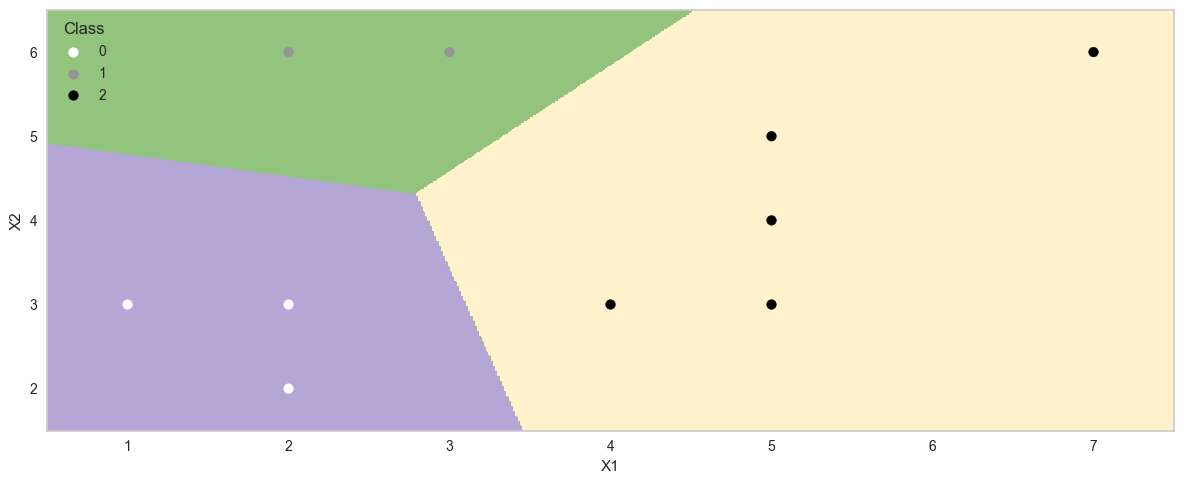

In [111]:
# Plotting the decision boundary using contour plot
x1_mesh, x2_mesh = np.meshgrid(
    np.linspace(x1.min() - 0.5, x1.max() + 0.5, 500).reshape(-1, 1),
    np.linspace(x2.min() - 0.5, x2.max() + 0.5, 500).reshape(-1, 1)
)

X_new = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
y_pred = softmax.predict(X_new)
zz = y_pred.reshape(x1_mesh.shape)

plt.figure(figsize=(12, 5))
plt.contourf(x1_mesh, x2_mesh, zz, cmap=matplotlib.colors.ListedColormap(['#b4a7d6','#93c47d','#fff2cc']))
scatter = plt.scatter(x1, x2, c=y_softmax_train)
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()
plt.show()

Performa model softmax regression dievaluasi sama dengan logistic regression, selayaknya classifier. Contohnya adalah akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 1.

In [112]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", softmax.score(X_test, y_softmax_test))

Nilai rata-rata akurasi: 1.0


### Penjelasan Dataset untuk *Softmax Regression*

Dataset yang digunakan pada bagian softmax regression adalah data terkait gambar dari dry beans. Data didapatkan dari Kaggle dengan beberapa perubahan. Berikut penjelasan masing-masing kolom pada data.

- **Area (A)**: Luas zona kacang dan jumlah piksel dalam batasnya.

- **Perimeter (P)**: Keliling kacang didefinisikan sebagai panjang tepinya.

- **Major axis length (L)**: jarak antara ujung-ujung garis terpanjang yang dapat ditarik dari kacang.

- **Minor axis length (l)**: Garis terpanjang yang dapat ditarik dari kacang sambil berdiri tegak lurus terhadap sumbu utama.

- **Aspect ratio (K)**: Mendefinisikan hubungan antara L dan l.

- **Eccentricity (Ec)**: Eksentrisitas elips yang momennya sama dengan daerah.

- **Convex area (C)**: Jumlah piksel dalam poligon cembung terkecil yang dapat memuat luas biji kacang.

- **Equivalent diameter (Ed)**: Diameter lingkaran yang luasnya sama dengan luas biji kacang.

- **Extent (Ex)**: Rasio piksel dalam kotak pembatas pada area kacang.

- **Solidity (S)**: Soliditas juga dikenal sebagai konveksitas, yaitu rasio piksel pada cangkang cembung dengan piksel pada kacang.

- **Roundness (R)**: Dihitung dengan rumus  (4*pi*A)/(P^2) dengan A adalah Area dan P adalah perimeter

- **Compactness (CO)**: Mengukur kebulatan suatu benda

- **ShapeFactor1 (SF1)**: Ukuran kacang

- **ShapeFactor2 (SF2)**: Ukuran kacang

- **ShapeFactor3 (SF3)**: Ukuran kacang

- **ShapeFactor4 (SF4)**: Ukuran kacang

- **Class**: Jenis Kacang, (0 = Seker, 1 = Barbunya, 2 = Bombay, 3 = Cali, 4 = Dermason, 5 = Horoz, dan 6 = Sira)

**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/whenamancodes/dry-beans-dataset
<br/> <br/>
<img src="https://storage.googleapis.com/kaggle-datasets-images/2048855/3398802/f484410f3cfb3f7f49d1216f57f18850/dataset-cover.jpg?t=2022-04-02-23-21-35" alt="Seker Dry Beans" width=300/>


In [113]:
import pandas as pd

# Import dataset dry beans dan menampilkan 5 row teratas
df_beans = pd.read_csv('dry_beans_dataset.csv')

# Melakukan encoding pada tiap label
df_beans["Class"] = df_beans["Class"].map({
    "SEKER": 0,
    "BARBUNYA": 1,
    "BOMBAY": 2,
    "CALI": 3,
    "DERMASON": 4,
    "HOROZ": 5,
    "SIRA": 6
})

df_beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0


In [114]:
# Menampilkan informasi keseluruhan terkait dataset
df_beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  int64  
dtypes: float64(1

#### Soal 6: Softmax Regression

a) Bagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.

In [115]:
beans = df_beans

In [116]:
x_beans = beans.drop(columns=["Class"])
y_beans = beans["Class"]

In [117]:
x_train_beans, x_test_beans, y_train_beans, y_test_beans = train_test_split(x_beans, y_beans, test_size = 0.2, random_state = 123)

b) Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

In [118]:
beansScaler = StandardScaler()

x_train_beans_scaled = x_train_beans
x_test_beans_scaled = x_test_beans

for column in x_train_beans_scaled.columns:
    x_train_beans_scaled[column] = beansScaler.fit_transform(x_train_beans_scaled[column].values.reshape(-1,1))
    x_test_beans_scaled[column] = beansScaler.transform(x_test_beans_scaled[column].values.reshape(-1,1))

In [119]:
x_train_beans_scaled.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
402,-0.589895,-0.799363,-0.987856,-0.195319,-1.482649,-1.965237,-0.594877,-0.671407,0.017320,0.925549,1.451965,1.717203,0.021796,1.711464,1.787851,0.872770
4603,0.704568,0.911332,0.900208,0.784718,0.360948,0.550715,0.709205,0.900724,0.562435,-0.595194,-0.566679,-0.465577,-1.042031,-0.906356,-0.494550,-0.138738
7492,-0.578581,-0.692460,-0.827790,-0.373209,-0.970668,-0.902166,-0.580443,-0.654707,-1.143993,0.372941,0.566162,0.973870,0.305574,1.030504,0.969370,-0.306477
3075,0.843096,1.162671,0.712968,1.290489,-0.480279,-0.219662,0.850892,1.041499,0.166818,-0.837975,-1.203386,0.413599,-1.475027,-0.524145,0.380597,0.649554
8989,-0.251123,-0.176680,0.035463,-0.487737,0.845853,0.858326,-0.257292,-0.200926,0.077012,0.786221,-0.237582,-0.868482,0.453747,-0.608435,-0.875708,0.673320


In [120]:
x_test_beans_scaled.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
10676,-0.874584,-1.141867,-1.165633,-0.968720,-0.791416,-0.624502,-0.873047,-1.120588,-0.043074,-0.135413,0.832070,0.777817,1.311416,1.420651,0.760592,0.622361
9185,-0.220486,-0.231816,-0.323999,0.029185,-0.595487,-0.359612,-0.224833,-0.161031,-0.722042,0.517887,0.479602,0.535267,-0.254503,0.246964,0.506398,0.307645
3357,2.673200,2.392878,1.932227,3.188147,-0.720359,-0.524190,2.656501,2.637188,0.893398,0.473321,0.163185,0.685957,-2.545818,-0.954071,0.663789,0.425450
806,-0.507493,-0.698885,-0.976329,0.076512,-1.756016,-2.799460,-0.512067,-0.551494,0.721668,0.770639,1.508266,2.141813,-0.325695,1.960680,2.274493,0.870927
13460,-0.433135,-0.538538,-0.571538,-0.277309,-0.625765,-0.398226,-0.437447,-0.446507,0.808353,0.663666,0.883269,0.581704,0.140263,0.514598,0.554714,0.686361


c) Buatlah suatu model softmax regression berdasarkan data yang telah dinormalisasi serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter pada LogisticRegression untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [121]:
softmax_beans = LogisticRegression(multi_class="multinomial", max_iter=1000)
softmax_beans.fit(x_train_beans_scaled, y_train_beans)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [122]:
beans_predict_y = softmax_beans.predict(x_test_beans_scaled)
print(beans_predict_y)

[4 6 2 ... 6 4 0]


In [123]:
evaluate_classifier_performance(beans_predict_y, y_test_beans)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       427
           1       0.96      0.87      0.91       271
           2       1.00      1.00      1.00       104
           3       0.91      0.95      0.93       336
           4       0.92      0.92      0.92       697
           5       0.96      0.96      0.96       370
           6       0.85      0.89      0.87       518

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



Confusion Matrix



prediction,0,1,2,3,4,5,6
actual,,,,,,,
0,399,3,0,0,10,0,15
1,2,235,0,22,0,3,9
2,0,0,104,0,0,0,0
3,2,6,0,320,0,2,6
4,6,0,0,0,642,1,48
5,0,0,0,8,2,355,5
6,5,1,0,1,42,10,459




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.9232464193903782
F1 Macro Average: 0.9338948153505697
F1 Micro Average: 0.9232464193903782
Precision Macro Average: 0.9372547540277635
Precision Micro Average: 0.9232464193903782
Recall Macro Average: 0.9315165837728818
Recall Micro Average: 0.9232464193903782



d) Berikan analisis mengenai perbedaan antara regresi softmax dengan regresi logistik.

Regresi logistik lebih cocok untuk digunakan pada situasi dimana kemungkinan hasil prediksi hanya terdiri dari 2 kelas, sebagai contoh 0 atau 1. Sedangkan regresi softmax lebih cocok jika hasil prediksi terdiri dari 3 kelas atau lebih. 

## Kompetisi Kaggle Regresi Berdasarkan Linear Models

Dalam rangka menerapkan pemahaman kalian pada materi model linear untuk kasus regresi serta sebagai sarana untuk **mendapatkan nilai tambahan**, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 6 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini atau kalian juga dapat mengaksesnya melalui laman course KASDAD pada SCELE. Klik tautan tersebut untuk mengakses halaman kompetisi.
*   Kerjakan solusi Anda menggunakan notebook ini.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.

**Tautan Kaggle Competition**
*   [Kaggle Competition Linear Model for Regression](https://www.kaggle.com/t/09051471139246639e739754ced8691a)

**Nilai Bonus**

Penentuan peserta yang mendapatkan nilai bonus akan ditentukan sesuai dengan peringkat dari masing-masing peserta di leaderboard, semakin tinggi peringkat kalian, semakin besar nilai bonus yang akan kalian dapatkan.

In [124]:
import pandas as pd
emission = pd.read_csv('co2_emissions_train.csv')
emission_test = pd.read_csv('co2_emissions_test.csv')

In [125]:
emission_train = emission
emission_train.head()

,Id,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions
0,6125,MAZDA,CX-5,SUV - SMALL,2.5,4,AS6,X,9.7,7.8,8.8,32,206
1,725,MERCEDES-BENZ,B 250,STATION WAGON - SMALL,2.0,4,AS7,Z,9.2,6.6,8.0,35,184
2,967,SUBARU,XV CROSSTREK AWD,SUV - SMALL,2.0,4,AV,X,9.5,7.2,8.5,33,196
3,1107,AUDI,A7 QUATTRO TDI (modified),MID-SIZE,3.0,6,AS8,D,9.8,6.2,8.1,35,217
4,290,CHRYSLER,300 SRT (MDS),FULL-SIZE,6.4,8,A5,Z,16.7,10.3,13.8,20,317


In [126]:
emission_test["Fuel Type"].unique()

array(['X', 'Z', 'E', 'D'], dtype=object)

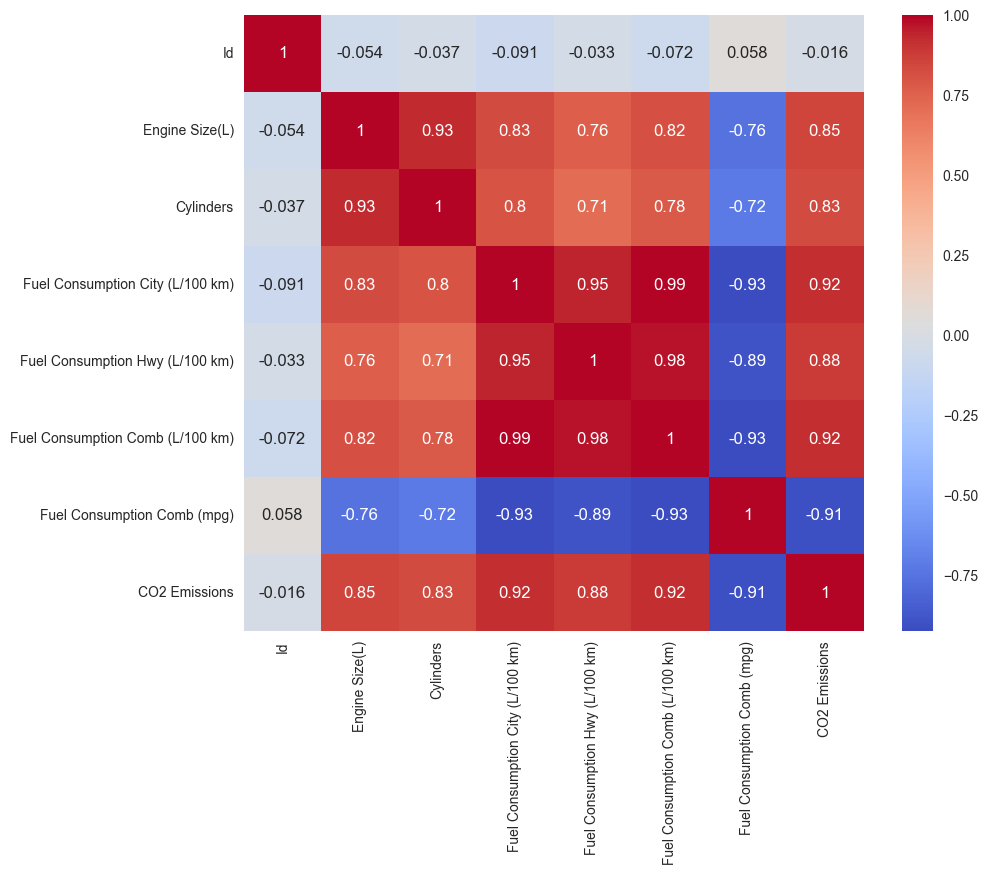

In [127]:
import numpy as np

plt.figure(figsize=(10, 8))

# Creating the heatmap
sns.heatmap(emission_train.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')

# Display the plot
plt.show()

In [128]:
# mengecek nilai null
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

Drop column id karena tidak memiliki informasi penting apa apa

In [129]:
emission_train = emission_train.drop(columns=["Id"], axis=1)
emission_test = emission_test.drop(columns=["Id"], axis=1)

In [130]:
check_null(emission_train)


Tidak ditemukan missing value pada dataset


Drop Fuel Consumption City, Fuel Consumption Hwy, Fuel Consumption City column cause it is the same with Fuel Consumption Comb

In [131]:
emission_train = emission_train.drop(columns=["Make", "Model", "Vehicle Class", "Transmission"], axis=1)
emission_test = emission_test.drop(columns=["Make", "Model", "Vehicle Class", "Transmission"], axis=1)

In [132]:
# emission_train.drop(columns=["Fuel Consumption Comb (L/100 km)"], inplace=True)

Drop Model feature cause of too much unique values on categorical column 

In [133]:
# emission_train.drop(columns=["Model"], inplace=True)

In [134]:
emission_train.head()

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions
0,2.5,4,X,9.7,7.8,8.8,32,206
1,2.0,4,Z,9.2,6.6,8.0,35,184
2,2.0,4,X,9.5,7.2,8.5,33,196
3,3.0,6,D,9.8,6.2,8.1,35,217
4,6.4,8,Z,16.7,10.3,13.8,20,317


binning vehicle class

In [135]:
def binning_vehicle_class(veclass):
    german = [make.upper() for make in  ["AUDI", "BMW", "Mercedes-Benz", "Porsche", "Volkswagen", "MINI", "Smart"]]
    japan = [make.upper() for make in ["Mazda", "Subaru", "Lexus", "Toyota", "Nissan", "Infiniti", "Acura", "Honda", "Mitsubishi"]]
    us = [make.upper() for make in["Chrysler", "Jeep", "Buick", "Cadillac", "Chevrolet", "Ford", "GMC", "Dodge", "Ram", "Tesla", "Lincoln"]]
    italy = [make.upper() for make in["Fiat", "Alfa Romeo", "Maserati", "Lamborghini", "Ferrari"]]
    uk = [make.upper() for make in["Land Rover", "Rolls-Royce", "Bentley", "Aston Martin", "Jaguar", "Mini"]]
    south_korea = [make.upper() for make in["Hyundai", "Kia", "Genesis"]]
    sweden = [make.upper() for make in["Volvo"]]
    other = [make.upper() for make in["Bugatti", "SRT"]]

    if veclass in german:
        return "German"
    elif veclass in japan:
        return "Japan"
    elif veclass in us:
        return "US"
    elif veclass in italy:
        return "Italy"
    elif veclass in uk:
        return "UK"
    elif veclass in south_korea:
        return "SouthKorea"
    elif veclass in sweden:
        return "Sweden"
    else :
        return "other"

In [136]:
# emission_train["Make"] = emission_train["Make"].apply(binning_vehicle_class)

In [137]:
# emission_train.drop(columns=["Make"], inplace=True)

In [138]:
emission_test["Fuel Type"].unique()

array(['X', 'Z', 'E', 'D'], dtype=object)

In [139]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Melakukan encoding pada data kategorikal
# make = ["SouthKorea", "Japan", "Sweden", "other", "German", "US", "Italy", "UK"]
# vehicle_class = ["STATION WAGON - SMALL", "COMPACT", "MID-SIZE", "SUV - SMALL", "SPECIAL PURPOSE VEHICLE", "MINICOMPACT", "STATION WAGON - MID-SIZE", "SUBCOMPACT", "MINIVAN", "FULL-SIZE",
#                  "TWO-SEATER", "PICKUP TRUCK - SMALL", "PICKUP TRUCK - STANDARD", "SUV - STANDARD", "VAN - CARGO", "VAN - PASSENGER"]
# transmission= ["AM5", "AV", "AV10", "AM6", "AV6", "AV7", "M5", "AV8", "AS4", "M6", "AS6", "AS9", "A9", "AM8", "M7", "AM9", "AS8", 
#                "AM7", "AS7", "A6", "AS5", "AS10", "A4", "A8", "A5", "A10", "A7"]
# fuel = ["N", "X", "D", "Z", "E"]
# emissionEncoder = OrdinalEncoder(categories=[make])

# categoricalColumn = ["Make"]
# emission_train = pd.concat([emission_train, emission_train_scaled], axis=1)
# emission_train_scaled.drop(columns=["Fuel Type"], axis=1, inplace=True)
# emission_train[categoricalColumn] = emissionEncoder.fit_transform(emission_train[categoricalColumn])
emission_train  =  pd.get_dummies(emission_train, columns=['Fuel Type'], dtype=float)
emission_test  =  pd.get_dummies(emission_test, columns=['Fuel Type'], dtype=float)
    


normalize numeric column

In [140]:
emission_train.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.5,4,9.7,7.8,8.8,32,206,0.0,0.0,0.0,1.0,0.0
1,2.0,4,9.2,6.6,8.0,35,184,0.0,0.0,0.0,0.0,1.0
2,2.0,4,9.5,7.2,8.5,33,196,0.0,0.0,0.0,1.0,0.0
3,3.0,6,9.8,6.2,8.1,35,217,1.0,0.0,0.0,0.0,0.0
4,6.4,8,16.7,10.3,13.8,20,317,0.0,0.0,0.0,0.0,1.0


In [141]:
emission_train["Fuel Type_N"].value_counts()

Fuel Type_N
0.0    5907
1.0       1
Name: count, dtype: int64

In [142]:
emission_train = emission_train.drop(columns=["Fuel Type_N"], axis=1)

In [143]:
emission_train.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions,Fuel Type_D,Fuel Type_E,Fuel Type_X,Fuel Type_Z
0,2.5,4,9.7,7.8,8.8,32,206,0.0,0.0,1.0,0.0
1,2.0,4,9.2,6.6,8.0,35,184,0.0,0.0,0.0,1.0
2,2.0,4,9.5,7.2,8.5,33,196,0.0,0.0,1.0,0.0
3,3.0,6,9.8,6.2,8.1,35,217,1.0,0.0,0.0,0.0
4,6.4,8,16.7,10.3,13.8,20,317,0.0,0.0,0.0,1.0


In [144]:
emission_test.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel Type_D,Fuel Type_E,Fuel Type_X,Fuel Type_Z
0,1.5,4,7.8,6.0,6.8,42,0.0,0.0,1.0,0.0
1,3.0,6,9.7,7.5,8.7,32,0.0,0.0,0.0,1.0
2,3.0,6,12.0,8.2,10.3,27,0.0,0.0,0.0,1.0
3,3.0,6,10.7,8.3,9.6,29,0.0,0.0,0.0,1.0
4,3.5,6,12.9,8.4,10.9,26,0.0,0.0,1.0,0.0


Membagi data menjadi training dan testing

In [145]:
x_emission = emission_train.drop(columns=["CO2 Emissions"])
y_emission = emission_train["CO2 Emissions"]

In [146]:

from sklearn.preprocessing import StandardScaler
emissionScaler = StandardScaler()
x_emission_scaled = emissionScaler.fit_transform(x_emission)
emission_test_scaled = emissionScaler.transform(emission_test)


In [147]:
from sklearn.model_selection import train_test_split
x_train_emission, x_test_emission, y_train_emission, y_test_emission = train_test_split(x_emission, y_emission, test_size = 0.2, random_state = 123)

In [148]:
from sklearn.linear_model import LinearRegression

linear_emission = LinearRegression()
linear_emission.fit(x_train_emission, y_train_emission)

LinearRegression()

In [149]:
emission_y_predict = linear_emission.predict(x_test_emission)
emission_y_predict = emission_y_predict.round()

In [150]:
for i, j in zip(y_test_emission, emission_y_predict):
    print(i, j)

269 274.0
225 225.0
303 302.0
215 213.0
267 272.0
257 255.0
287 285.0
191 195.0
253 253.0
322 329.0
242 243.0
250 249.0
258 257.0
183 183.0
321 318.0
272 269.0
307 306.0
209 207.0
262 267.0
245 247.0
253 258.0
264 263.0
181 180.0
247 247.0
221 222.0
299 295.0
237 240.0
193 197.0
421 415.0
201 201.0
214 213.0
389 384.0
336 335.0
278 275.0
380 378.0
334 328.0
180 178.0
493 488.0
177 180.0
228 230.0
219 220.0
203 203.0
332 332.0
349 344.0
200 204.0
208 211.0
110 102.0
167 165.0
220 220.0
233 234.0
264 269.0
282 282.0
244 243.0
260 260.0
340 340.0
347 343.0
190 188.0
262 268.0
295 292.0
246 251.0
288 287.0
270 269.0
285 284.0
309 308.0
265 265.0
322 321.0
226 229.0
255 260.0
336 331.0
269 275.0
163 163.0
341 337.0
255 258.0
207 206.0
297 295.0
253 257.0
258 257.0
306 310.0
220 220.0
293 293.0
388 382.0
196 197.0
309 308.0
251 252.0
300 299.0
175 178.0
278 277.0
232 231.0
193 194.0
223 228.0
314 312.0
184 187.0
258 260.0
172 173.0
313 311.0
178 176.0
281 282.0
185 188.0
247 246.0
254 253.0


In [151]:
evaluation_lasso_model(y_test_emission, emission_y_predict)

Mean Absolute Error (MAE): 2.81
Mean Squared Error (MSE): 16.78
Root Mean Squared Error (RMSE): 4.10
R-squared: 0.99520567


In [152]:
from sklearn.linear_model import Ridge

emission_ridge = Ridge(alpha=2)
emission_ridge.fit(x_train_emission, y_train_emission)

Ridge(alpha=2)

In [153]:
emission_ridge_predict = emission_ridge.predict(x_test_emission)
evaluation_lasso_model(y_test_emission, emission_ridge_predict)

Mean Absolute Error (MAE): 2.88
Mean Squared Error (MSE): 17.23
Root Mean Squared Error (RMSE): 4.15
R-squared: 0.99507783


In [154]:
from sklearn .linear_model import Lasso

emission_lasso = Lasso(alpha=2)
emission_lasso.fit(x_train_emission, y_train_emission)

Lasso(alpha=2)

In [155]:
emission_lasso_predict = emission_lasso.predict(x_test_emission)
evaluation_lasso_model(y_test_emission, emission_lasso_predict)

Mean Absolute Error (MAE): 8.97
Mean Squared Error (MSE): 190.15
Root Mean Squared Error (RMSE): 13.79
R-squared: 0.94567646


In [156]:
linear_all_emission = LinearRegression()
linear_all_emission.fit(x_emission, y_emission)

LinearRegression()

In [157]:
result = linear_all_emission.predict(emission_test)
result = result.round()
result

array([160., 206., 242., ..., 384., 101., 229.])

In [158]:
emission

,Id,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions
0,6125,MAZDA,CX-5,SUV - SMALL,2.5,4,AS6,X,9.7,7.8,8.8,32,206
1,725,MERCEDES-BENZ,B 250,STATION WAGON - SMALL,2.0,4,AS7,Z,9.2,6.6,8.0,35,184
2,967,SUBARU,XV CROSSTREK AWD,SUV - SMALL,2.0,4,AV,X,9.5,7.2,8.5,33,196
3,1107,AUDI,A7 QUATTRO TDI (modified),MID-SIZE,3.0,6,AS8,D,9.8,6.2,8.1,35,217
4,290,CHRYSLER,300 SRT (MDS),FULL-SIZE,6.4,8,A5,Z,16.7,10.3,13.8,20,317
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5903,4030,MAZDA,MAZDA3 5-DOOR,MID-SIZE,2.5,4,AS6,X,9.0,6.7,7.8,36,183
5904,2940,MAZDA,CX-3,COMPACT,2.0,4,AS6,X,8.2,6.7,7.6,37,179
5905,1334,CHEVROLET,MALIBU,MID-SIZE,2.5,4,AS6,X,9.3,6.4,8.0,35,184
5906,1579,HONDA,FIT,STATION WAGON - SMALL,1.5,4,AV,X,7.0,5.7,6.4,44,147


In [159]:
emission_id = pd.read_csv('co2_emissions_test.csv')

prediction_df = pd.DataFrame({
    "Id": emission_id["Id"],
    "CO2 Emissions": result
})

# prediction_df["satisfaction_level"] = labelencode.inverse_transform(prediction_df["satisfaction_level"])

# jawaban = []

# for data in prediction_df["satisfaction_level"]:
#     if data == "Bad":
#         jawaban.append(1)
#     elif data == "Average":
#         jawaban.append(2)
#     else:
#         jawaban.append(3)
        
# prediction_df["satisfaction_level"] = jawaban

prediction_df.to_csv('LinearRegressionPrediction.csv', index=False)

